In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom
import os
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Some constants 
root_folder = "/docs/src/kt/data"
series_folder = "/docs/src/kt/data_by_series"
resized_series_folder = "/docs/src/kt/data_by_series_resized"
IMAGES_PATH = "/docs/src/kt/data_by_series_resized_images"
MIN_NUMBER_OF_PHOTO = 100
EMPTY_VALUE = 0

patients = os.listdir(series_folder)
patients.sort()

curr_patient = patients[0]

In [2]:
def load_scan(path):
    slices = [pydicom.dcmread(path + "/" + _) for _ in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness  = slice_thickness

    return slices


In [3]:
def get_pixel_hu(slices):
    image = np.stack([_.pixel_array for _ in slices])
    image = image.astype(np.int16)

    image[image == -2000] = 0

    for slice_number in range(len(slices)):
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope

        if slope != 1:
            image[slice_number] = slope * image[slice_number].as_type(np.float64)
            image[slice_number] = image[slice_number].as_type(np.int16)

        image[slice_number] += np.int16(intercept)

    return np.array(image, dtype=np.int16)
    

In [4]:
slices = load_scan(series_folder + "/" + curr_patient + "/12")
image = get_pixel_hu(slices)


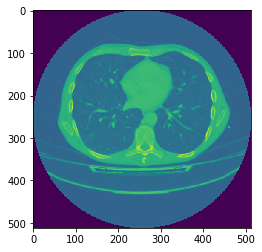

In [11]:
plt.imshow(image[550])

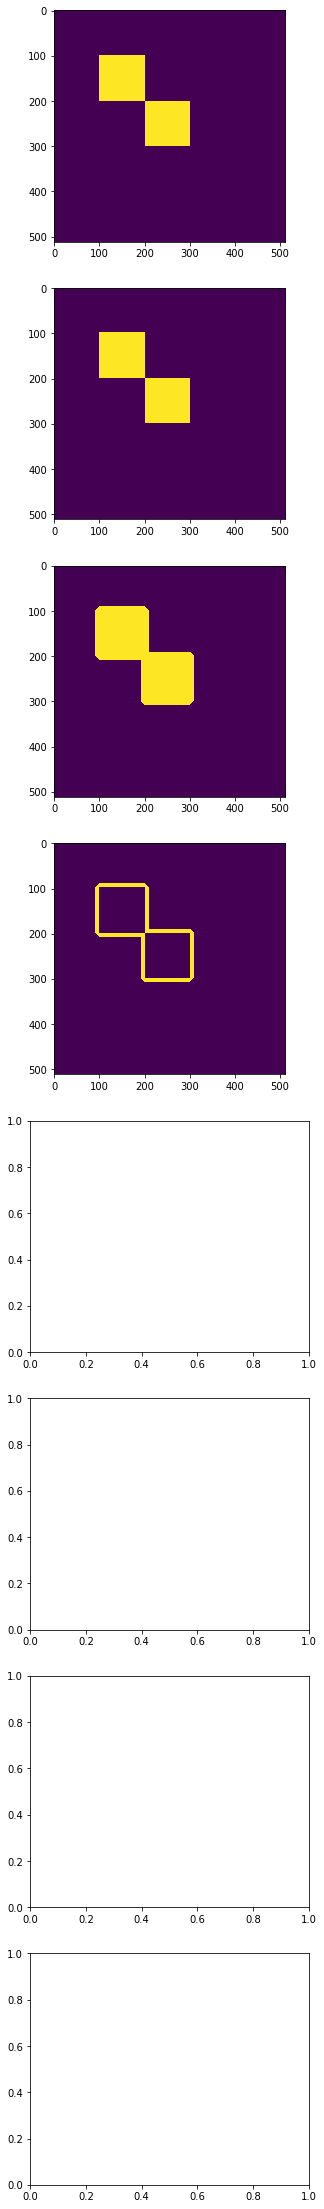

In [6]:
f, plots = plt.subplots(8, 1, figsize=(5, 40))
squares = np.zeros(shape=(512, 512))
squares[100:200, 100:200] = 1
squares[200:300, 200:300] = 1
squares_dilated_1 = np.array(squares == 1, dtype=np.bool)
squares_dilated_2 = ndimage.binary_dilation(squares, iterations=9)
squares_dilated_3 = squares_dilated_2 ^ squares_dilated_1
plots[0].imshow(squares)
plots[1].imshow(squares_dilated_1)
plots[2].imshow(squares_dilated_2)
plots[3].imshow(squares_dilated_3)
# plt.imshow()

In [45]:
np.unique(squares_dilated_1)

array([ True])

In [48]:
squares==1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [65]:
ball_10 = morphology.ball(10)
print(ball_10.mean())
ball_15 = ndimage.binary_dilation(ball_10, iterations=2)
print(ball_15.mean())


0.45016736853471545
0.6674225245653818
